In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [179]:
data=pd.read_excel("Linear Regression.xlsx")
data.head()


,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


### we want to know the price for given indedepent variables i.e. sqft_living, bedrooms ,bathrooms ,floors

#### price is our dependent variable
#### we want to know the relationship between price and other independent variables

In [180]:
data.dtypes

price            int64
sqft_living      int64
bedrooms         int64
bathrooms      float64
floors         float64
dtype: object

## Checking information about given data

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


## checking null values

In [182]:
data.isna().any()

price          False
sqft_living    False
bedrooms       False
bathrooms      False
floors         False
dtype: bool

#### No null values pressent

In [183]:
data.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000250A6AC6E48>,
      dtype=object)

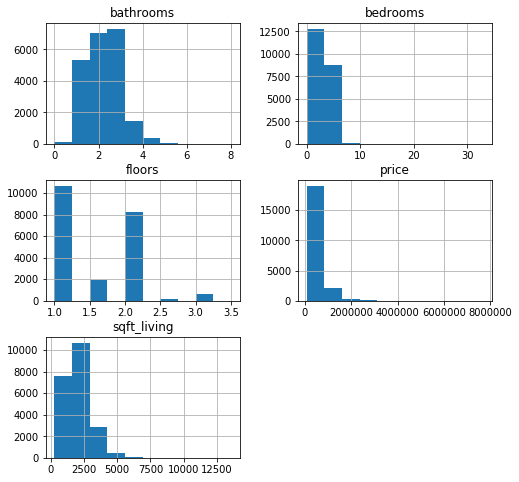

In [184]:
data.hist(figsize=(8,8))

# Inference from Histogram:
1. Bathrooms has negative Skewness ie Mean < Median
2. Bedrooms has positive Skewness ie Mean > Median
3. Price  has positive Skewness ie Mean > Median
4. Sqft_living has positive Skewness ie Mean > Median
5. Floors is Multimodal

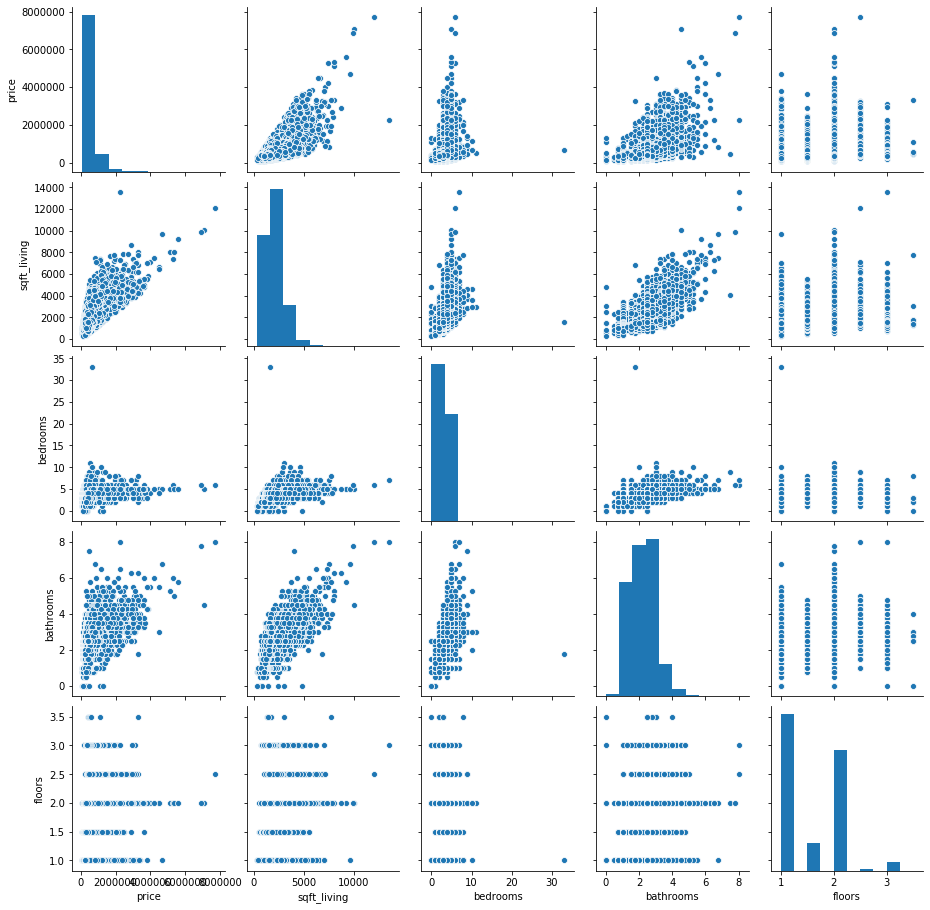

In [185]:
sns.pairplot(data)

# inference from pairplot
1. price is positively correlated with area in square feet, no. of bathrooms ,no. of bedrooms 
2. There's neglegible relationship between price and no.of floors

# To check in how much extent the Price is related with others 
# plot heatmap

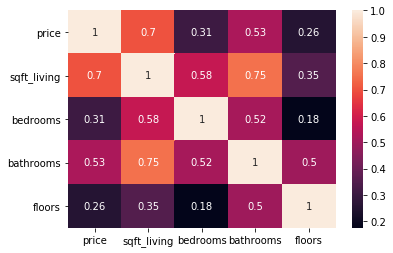

In [186]:
sns.heatmap(data.corr(),annot=True)

# Infererence from heatamp:
   1. price is __strongly__ correlated with area in square feet .
   2. price is __moderate__ correlated with no of bedrooms and bathrooms.
   3. __Neglegible__ ammount of relationship between price and no of floors encountered.

# Detect outliers

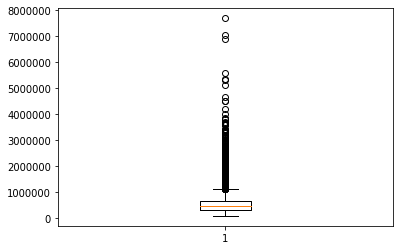

In [187]:
plt.boxplot(data["price"])
plt.show()

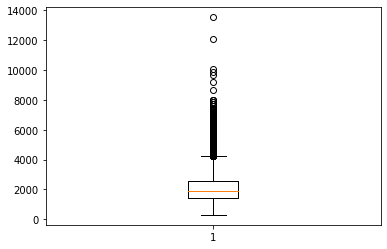

In [188]:
plt.boxplot(data["sqft_living"])
plt.show()

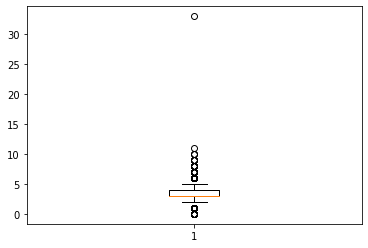

In [189]:
plt.boxplot(data["bedrooms"])
plt.show()

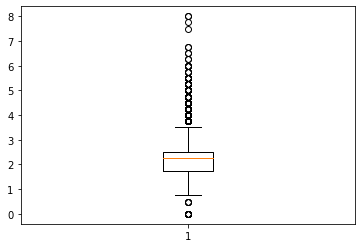

In [190]:
plt.boxplot(data["bathrooms"])
plt.show()

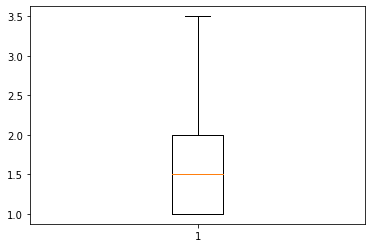

In [191]:
plt.boxplot(data["floors"])
plt.show()

# inference from Boxplot:
   1. price is having too many outliers.
   2. square feet is also having large no of outliers.
   3. no. of bedrooms and bathrooms are having moderate outliers.
   4. floor has no outliers.

    
#### we can remove extreme outliers.

# 1.Linear Regression Between Price and SQFt

### here price is dependent variable and sqft is independent variable


In [192]:
data.head(1)

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.0,1.0


In [193]:
# assign the variables
x=data.iloc[:,1:2]
x.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [194]:
y=data.iloc[:,0:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


# Ploting scatterplot

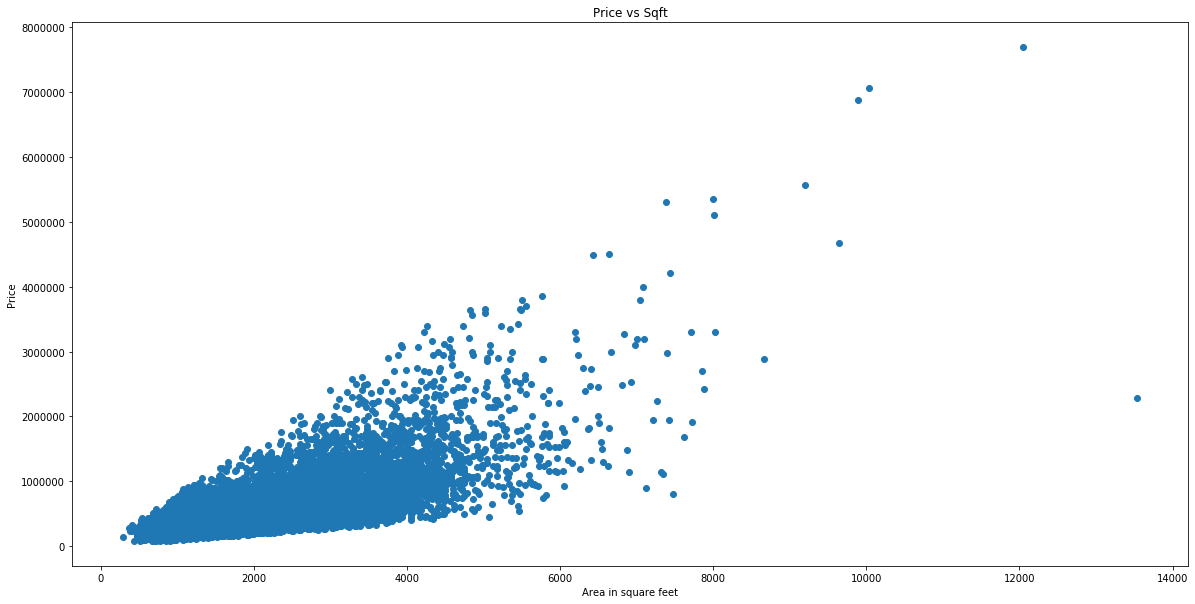

In [195]:
plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.title("Price vs Sqft")
plt.ylabel("Price")
plt.xlabel("Area in square feet")
plt.show()

 __Split the dataset into training and testing sets__

In [196]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [197]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [198]:
reg.fit(x_train, y_train) #fitting the given model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [199]:
print("Intercept is: ", reg.intercept_)
print("slope is: ", reg.coef_)

Intercept is:  [-41947.45007397]
slope is:  [[279.51011494]]


# Therefore equation of best fit line is given by
## y=279.51011494( x ) - 41947.45007397

__where
x=price__ 
   
####   y= area in square feet

In [200]:
# to predict the values from test set
ypred = reg.predict(x_test)
print("Predicted values: ", end=" \n \n")
print(ypred)

Predicted values:  
 
[[ 536638.48784377]
 [ 768631.88324074]
 [1011805.68323515]
 ...
 [ 279489.18210255]
 [ 556204.1958893 ]
 [ 659622.93841566]]


# visualizing

Text(0, 0.5, 'Price')

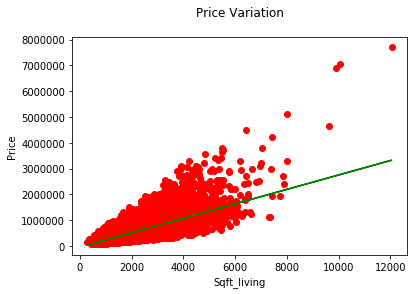

In [201]:
# for trained data
plt.scatter(x_train,y_train,color = 'red')
plt.plot(x_train,reg.predict(x_train),color = 'green')
plt.title("Price Variation\n")
plt.xlabel("Sqft_living")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

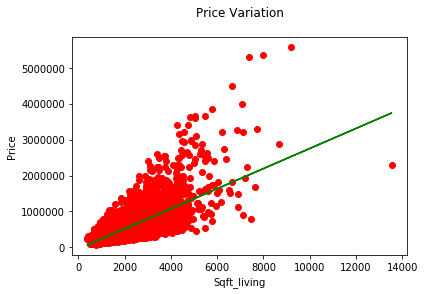

In [202]:
# for testing data set data
plt.scatter(x_test,y_test,color = 'red')
plt.plot(x_test,reg.predict(x_test),color = 'green')
plt.title("Price Variation\n")
plt.xlabel("Sqft_living")
plt.ylabel("Price")

## calculate $R^2$ value and RMSE value

In [203]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
print("r square value is: ", r2_score(y_test, ypred))
print("RMSE value is : ",np.sqrt(mean_squared_error(y_test, ypred)))

r square value is:  0.48388318901296545
RMSE value is :  272965.1903603254


# inferrence:
1. $R^2$ = 0.5051792987573274 indicating about 56% square feet area is affecting the price.
2. __RMSE__ value showing differnce between predicted and actual value.
     

# 2. Linear Regression Between Price and Bedrooms

### here price is dependent variable and Bedrooms is independent variable


In [204]:
x=data.iloc[:,2:3]
x.head()

,bedrooms
0,3
1,3
2,2
3,4
4,3


In [205]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


# Ploting scatterplot

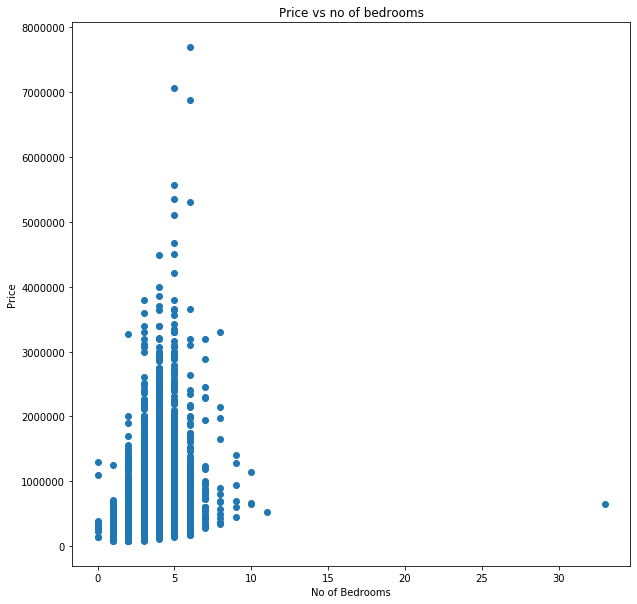

In [206]:
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.title("Price vs no of bedrooms")
plt.ylabel("Price")
plt.xlabel("No of Bedrooms")
plt.show()

In [207]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [208]:
reg.fit(x_train, y_train) #fitting the given model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [209]:
print("Intercept is: ", reg.intercept_)
print("slope is: ", reg.coef_)

Intercept is:  [139053.13822254]
slope is:  [[118425.4366424]]


# Therefore equation of best fit line is given by
## y= 118425.4366424( x ) + 139053.13822254

__where
x=price__ 
   
####   y= no. of bedroom

In [210]:
# to predict the values from test set
ypred = reg.predict(x_test)
print("Predicted values: ", end=" \n \n")
print(ypred)

Predicted values:  
 
[[612754.88479215]
 [731180.32143456]
 [612754.88479215]
 ...
 [494329.44814975]
 [494329.44814975]
 [612754.88479215]]


# visualization

Text(0, 0.5, 'Price')

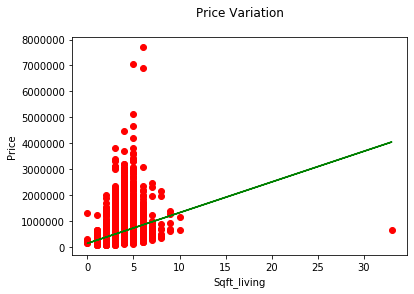

In [211]:
# for trained data
plt.scatter(x_train,y_train,color = 'red')
plt.plot(x_train,reg.predict(x_train),color = 'green')
plt.title("Price Variation\n")
plt.xlabel("Sqft_living")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

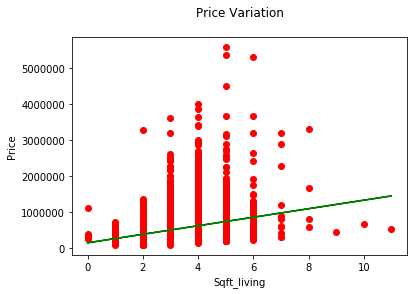

In [212]:
# for testing data set data
plt.scatter(x_test,y_test,color = 'red')
plt.plot(x_test,reg.predict(x_test),color = 'green')
plt.title("Price Variation\n")
plt.xlabel("Sqft_living")
plt.ylabel("Price")

# calculate $R^2$ value and RMSE value

In [213]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
print("r square value is: ", r2_score(y_test, ypred))
print("RMSE value is : ",np.sqrt(mean_squared_error(y_test, ypred)))

r square value is:  0.09758625707518032
RMSE value is :  360940.9152651826


# inferrence:
1. $R^2$ = 0.09758625707518032 indicating about 9% square feet area is affecting the price.
2. __RMSE__ value showing differnce between predicted and actual value.

# 3. Linear Regression Between Price and Bathrooms

### here price is dependent variable and Bedrooms is independent variable


In [214]:
x=data.iloc[:,3:4]
x.head()

,bathrooms
0,1.00
1,2.25
2,1.00
3,3.00
4,2.00


In [215]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


# ploting scatterplot

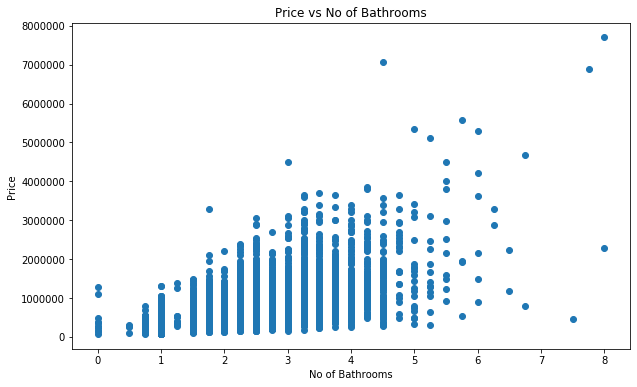

In [216]:
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.title("Price vs No of Bathrooms")
plt.ylabel("Price")
plt.xlabel("No of Bathrooms")
plt.show()

In [217]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [218]:
reg.fit(x_train, y_train) #fitting the given model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [219]:
print("Intercept is: ", reg.intercept_)
print("slope is: ", reg.coef_)

Intercept is:  [13513.13889573]
slope is:  [[249375.03130974]]


# Therefore equation of best fit line is given by
## y= 249375.03130974( x ) + 13513.13889573

__where
x=price__ 
   
####   y= no of bathrooms

In [220]:
# to predict the values from test set
ypred = reg.predict(x_test)
print("Predicted values: ", end=" \n \n")
print(ypred)

Predicted values:  
 
[[574606.95934264]
 [387575.68586034]
 [262888.17020547]
 ...
 [636950.71717008]
 [574606.95934264]
 [449919.44368777]]


# visualization

Text(0, 0.5, 'Price')

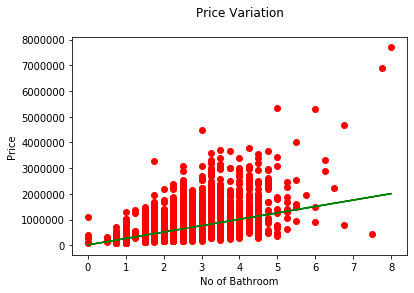

In [221]:
# for trained data
plt.scatter(x_train,y_train,color = 'red')
plt.plot(x_train,reg.predict(x_train),color = 'green')
plt.title("Price Variation\n")
plt.xlabel("No of Bathroom")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

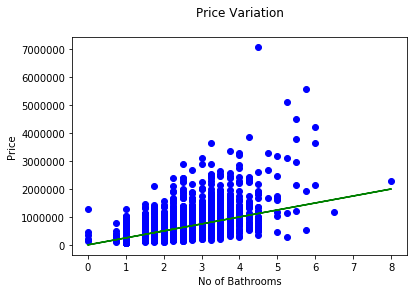

In [222]:
# for testing data set data
plt.scatter(x_test,y_test,color = 'b')
plt.plot(x_test,reg.predict(x_test),color = 'green')
plt.title("Price Variation\n")
plt.xlabel("No of Bathrooms")
plt.ylabel("Price")

# calculate $R^2$ value and RMSE value

In [223]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
print("r square value is: ", r2_score(y_test, ypred))
print("RMSE value is : ",np.sqrt(mean_squared_error(y_test, ypred)))

r square value is:  0.2729690023991551
RMSE value is :  318269.0570555351


# inferrence:
1. $R^2$ =  0.2729690023991551 indicating about 27% square feet area is affecting the price.
2. __RMSE__ value showing differnce between predicted and actual value.

# 4. Linear Regression Between Price and No. of Floor

## here price is dependent variable and Bedrooms is independent variable


In [224]:
x=data.iloc[:,4:5]
x.head()

,floors
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0


In [225]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


# ploting scatterplot

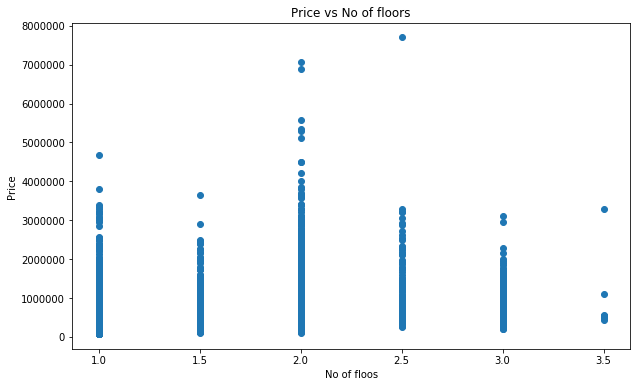

In [226]:
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.title("Price vs No of floors")
plt.ylabel("Price")
plt.xlabel("No of floos")
plt.show()

In [227]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [228]:
reg.fit(x_train, y_train) #fitting the given model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [229]:
print("Intercept is: ", reg.intercept_)
print("slope is: ", reg.coef_)

Intercept is:  [283855.89650181]
slope is:  [[171935.92961605]]


# Therefore equation of best fit line is given by
## y= 171935.92961605( x ) + 283855.89650181

__where
x=price__ 
   
####   y= no of floors

In [230]:
# to predict the values from test set
ypred = reg.predict(x_test)
print("Predicted values: ", end=" \n \n")
print(ypred)

Predicted values:  
 
[[541759.79092589]
 [455791.82611786]
 [455791.82611786]
 ...
 [627727.75573391]
 [627727.75573391]
 [541759.79092589]]


# visualization

Text(0, 0.5, 'Price')

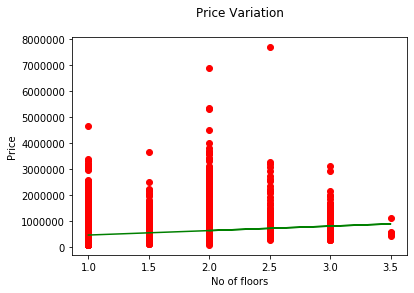

In [231]:
# for trained data
plt.scatter(x_train,y_train,color = 'red')
plt.plot(x_train,reg.predict(x_train),color = 'green')
plt.title("Price Variation\n")
plt.xlabel("No of floors")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

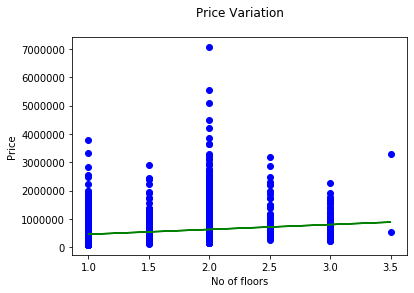

In [232]:
# for testing data set data
plt.scatter(x_test,y_test,color = 'b')
plt.plot(x_test,reg.predict(x_test),color = 'green')
plt.title("Price Variation\n")
plt.xlabel("No of floors")
plt.ylabel("Price")

# calculate $R^2$ value and RMSE value

In [233]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
print("r square value is: ", r2_score(y_test, ypred))
print("RMSE value is : ",np.sqrt(mean_squared_error(y_test, ypred)))

r square value is:  0.0687966797810432
RMSE value is :  360197.09959698736


# inferrence:
1. $R^2$ =   0.0687966797810432 indicating about 27% square feet area is affecting the price.
2. __RMSE__ value showing differnce between predicted and actual value.

# 5. Linear Regression Between Price and all other independent variable

In [234]:
x = data.drop(['price'], axis=1)
x.head()

,sqft_living,bedrooms,bathrooms,floors
0,1180,3,1.00,1.0
1,2570,3,2.25,2.0
2,770,2,1.00,1.0
3,1960,4,3.00,1.0
4,1680,3,2.00,1.0


In [235]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


# spliting dataset into train and test set

In [236]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [237]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [238]:
print("Intercept is: ", reg.intercept_)
print("slope is: ", reg.coef_)

Intercept is:  [73808.86183529]
slope is:  [[   306.72838252 -55720.77178327   8705.50888837   -266.52957882]]


# Therefore equation of best fit line is given by
### y= 306.72838252(x1) - 55720.77178327(x2) + 8705.50888837(x3) -266.52957882(x4) +73808.86183529

__where
y=price__ 
   
####   x1= sqft
####   x2=bedroom
####   x3=bathroom
####   x4=floor


In [239]:
# to predict the values from test set
ypred = reg.predict(x_test)
print("Predicted values: ")
print(ypred)

Predicted values: 
[[609328.77721079]
 [585038.87031192]
 [415562.45223517]
 ...
 [599102.75434259]
 [339784.19873135]
 [516024.79183523]]


# calculate $R^2$ value and RMSE value

In [240]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
print("r square value is: ", r2_score(y_test, ypred))
print("RMSE value is : ",np.sqrt(mean_squared_error(y_test, ypred)))

r square value is:  0.5105722437453338
RMSE value is :  261133.29646851748


# inferrence:
1. $R^2$ =   0.5105722437453338 indicating about 51% square feet area is affecting the price.
2. __RMSE__ value showing differnce between predicted and actual value.